# Задание

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
name2question = data.iloc[0] 
name2question[75]

'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Matplotlib '

## Задание 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

In [3]:
# Код тут
#%matplotlib notebook
data.drop(0, inplace=True)

In [4]:
#Q2 - What is your age (# years)?
data_age = data.Q2.value_counts(normalize=True).round(3)
data_age

Q2
18-21    0.190
25-29    0.186
22-24    0.178
30-34    0.124
35-39    0.098
40-44    0.080
45-49    0.052
50-54    0.038
55-59    0.025
60-69    0.022
70+      0.005
Name: proportion, dtype: float64

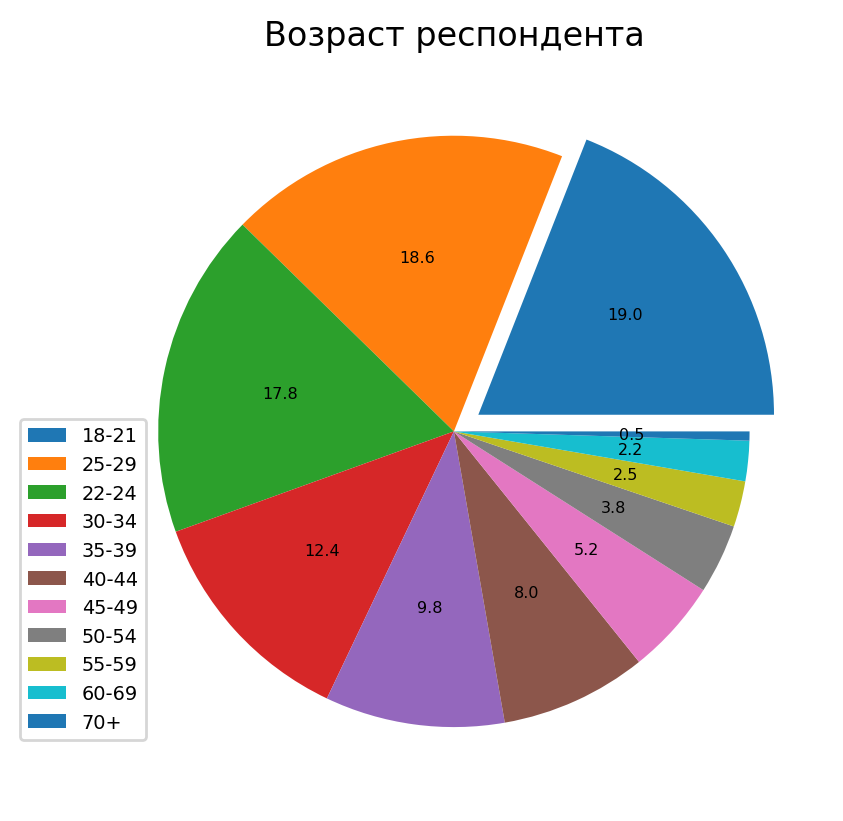

In [5]:
fig, ax = plt.subplots(dpi=200)
#ax = fig.add_subplot()
wedges, texts, autotexts = ax.pie(data_age.values,  # данные
                                  autopct='%.1f',   # формат вывода в"дольках"
                                  explode=[0.1,0,0,0,0,0,0,0,0,0,0], # вырезать 1-ю "дольку" на 0,1 размера
                                  labels=None  # без подписей снаружи "долек" (можно не указывать)
                                 )  
ax.legend(wedges, list(data_age.index), loc="lower left",
          bbox_to_anchor=(-0.1, 0.07, 0., 0.), fontsize='x-small') # сдвиг легенды...
plt.setp(autotexts,  # ...в "дольках" (autotexts)
         size='xx-small',  # размер шрифта
         weight='normal',  # вес (напр. 'bold')
         style='normal',  # стиль (напр. 'italic')
        )  
_ = ax.set_title('Возраст респондента')

## Задание 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации. \
Отсортируй библиотеки по уменьшению популярности. Используй цветовую палитру 'colorblind'.

In [6]:
# Код тут
# Q15 - 'Do you use any of the following data visualization libraries on a regular basis?  \
#(Select all that apply) - Selected Choice - ...'
import seaborn as sns
q15_col = [col for col in data.columns if col.startswith('Q15')]
lib_vis = data.melt(                    # разворачивает данные в таблице из wide-формата в long
                    var_name='Q15x',    # имя нового столбца, значения - названия столбцов из списка
                    value_vars=q15_col, # список столбцов для объединения
                    value_name='Libr'   # имя столбца, для данных (столбцов из списка)
                    ).dropna()
print(lib_vis)
ds = lib_vis.groupby(['Libr'], as_index=False) \
    .agg({'Q15x': 'count'}).sort_values('Q15x', ascending=False)
ds

          Q15x          Libr
1        Q15_1   Matplotlib 
2        Q15_1   Matplotlib 
3        Q15_1   Matplotlib 
5        Q15_1   Matplotlib 
6        Q15_1   Matplotlib 
...        ...           ...
359831  Q15_15         Other
359848  Q15_15         Other
359896  Q15_15         Other
359909  Q15_15         Other
359937  Q15_15         Other

[39746 rows x 2 columns]


Libr   Q15x
8                 Matplotlib   14010
11                   Seaborn   10512
9    Plotly / Plotly Express    5078
5           Ggplot / ggplot2    4145
4                 Geoplotlib    1167
12                     Shiny    1043
1                      Bokeh     771
2                      D3 js     734
13                      Other    691
7           Leaflet / Folium     554
10                     Pygal     318
0                     Altair     300
3                   Dygraphs     225
6                Highcharter     198

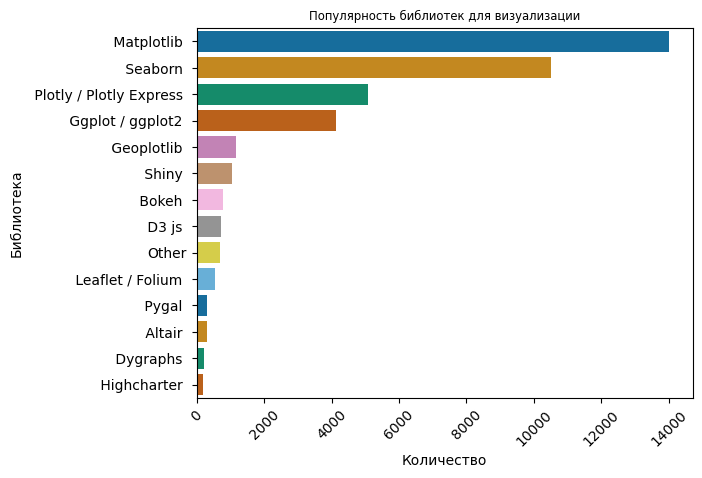

In [7]:
ax1 = sns.barplot(data=ds, y=ds.Libr, x=ds.Q15x, 
                   palette='colorblind', width=0.8)
ax1.set_xlabel('Количество')
ax1.set_ylabel('Библиотека')
ax1.tick_params(axis='x', labelrotation = 45)
ax1.set_title('Популярность библиотек для визуализации', 
                   fontsize='small');

## Задание 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям. \
Отсортируй специальности по убыванию медианы заработка. Используй цветовую палитру 'colorblind'

In [8]:
# Код тут
#Q23 - Select the title most similar to your current role (or most recent title if retired): - Selected Choice
#Q29 - What is your current yearly compensation (approximate $USD)?

str_spec = ''  # строка, для поиска нечисловых символов
for word in data.Q29.dropna().unique():
    for ch in word:
        if not ch.isdigit() and not ch in str_spec:
            str_spec += ch
str_spec = str_spec.replace('-','') #  оставить разделитель "-"
#print('str_spec:', str_spec)

compensation_map = {}  # Словарь, для замены и вычисления медианы дохода
for x in data['Q29'].dropna().unique():
    y = x.translate(x.maketrans('','',',$>'))
    if len(y.split('-')) == 1:  # если одно число
        compensation_map[x] = int(y)
    else:
        i, j = y.split('-')     # если два числа
        compensation_map[x] = round((int(i) + int(j)) / 2, 0)

#print('\nQ29\n', data['Q29'].dropna())
data['Q29n'] = data['Q29'].map(compensation_map)         # Замена на среднее значение из диапазона
#print('\nQ29n\n', data['Q29n'].dropna())

data_spec = data[['Q23', 'Q29n']].dropna()               # Выборка Специальность - Доход
#print('\ndata_spec\n', data_spec)

# Предварительная таблица с группировкой по зарплате
data_med = data_spec.groupby(['Q23'], as_index=False) \
                    .agg({'Q29n': 'median'})             # Считаем медиану дохода
data_med = data_med.rename(columns={'Q29n':'Q29med'})    # Переименуем столбец с медианой
#print('\ndata_med\n', data_med)

data_med = pd.merge(data_spec, data_med, how='left') \
            .sort_values('Q29med', ascending=False)      # Окончательную таблицу отсортируем по убыванию медианы
#print('\ndata_med\n', data_med)

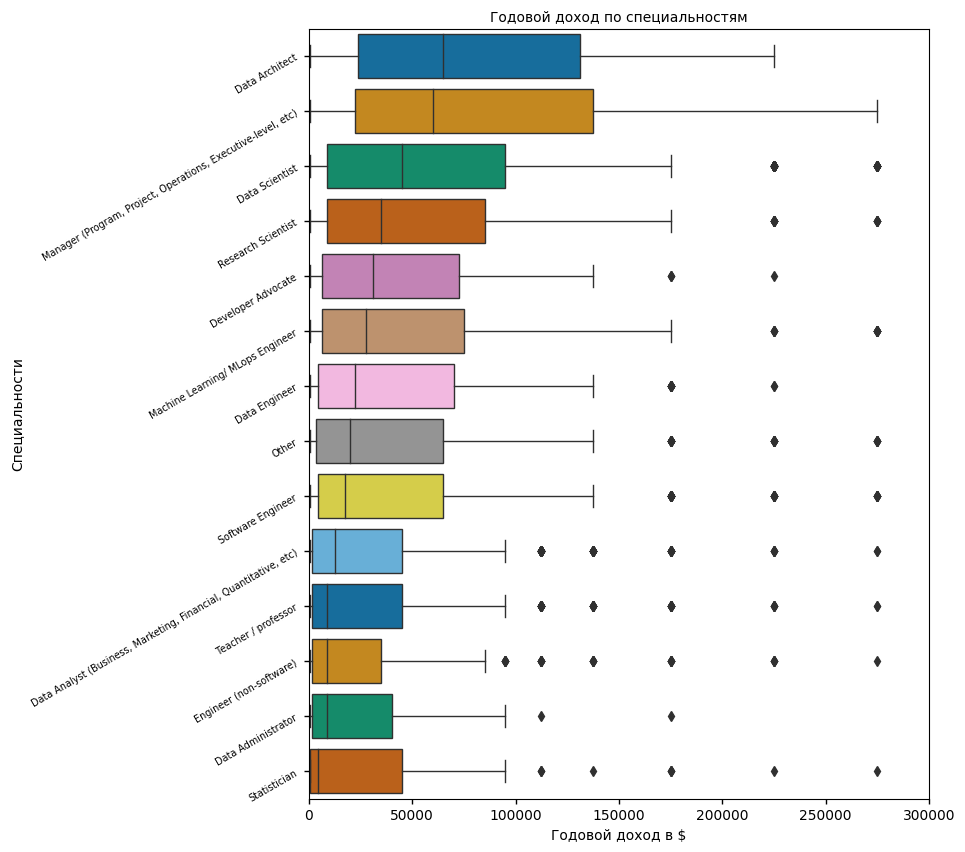

In [9]:
fig1, ax1 = plt.subplots(figsize=(8, 10))                           # В переменных - фигура с осями
ax2 = sns.boxplot(data=data_med, x='Q29n', y='Q23', ax=ax1,        # x - доход, y - специальность
                    palette='colorblind', width=0.8, linewidth=1)
ax2.set_xlabel('Годовой доход в $')
ax2.set_ylabel('Специальности')
ax2.tick_params(axis='y', labelrotation = 30, labelsize='x-small')
ax2.tick_params(width=1)
ax2.set_title('Годовой доход по специальностям', 
                   fontsize='medium')
ax2.set(xlim=(0, 300000));

## Задание 4
Используя модуль graph_objects из библиотеки plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect. \
Цвета в этом задании не важны

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
# Код тут
# Q2 - What is your age (# years)?
# Q23 - Select the title most similar to your current role (or most recent title if retired): - Selected Choice

spec_list = [['Data Administrator', 'Data Analyst', 'Data Engineer'],        # Список специальностей для выборки
             ['Data Scientist', 'Engineer', 'Machine Learning'], 
             ['Research Scientist', 'Software Engineer', 'Data Architect']]
title_list= ['Data Administrator', 'Data Analyst', 'Data Engineer',          # Список специальностей для диаграмм
             'Data Scientist', 'Engineer', 'MLops Engineer', 
             'Research Scientist', 'Software Engineer', 'Data Architect']
# Таблица - Специальность, Возраст, Количество
data4 = data[data['Q23'].notna()] \
            [['Q23', 'Q2']] \
            .groupby(['Q23', 'Q2'], as_index=False) \
            .value_counts() \
            .rename(columns={'count': 'counter'})
data4[80:85]

Q23     Q2  counter
80           Engineer (non-software)  55-59       13
81           Engineer (non-software)  60-69       17
82           Engineer (non-software)    70+        5
83  Machine Learning/ MLops Engineer  18-21        7
84  Machine Learning/ MLops Engineer  22-24       90

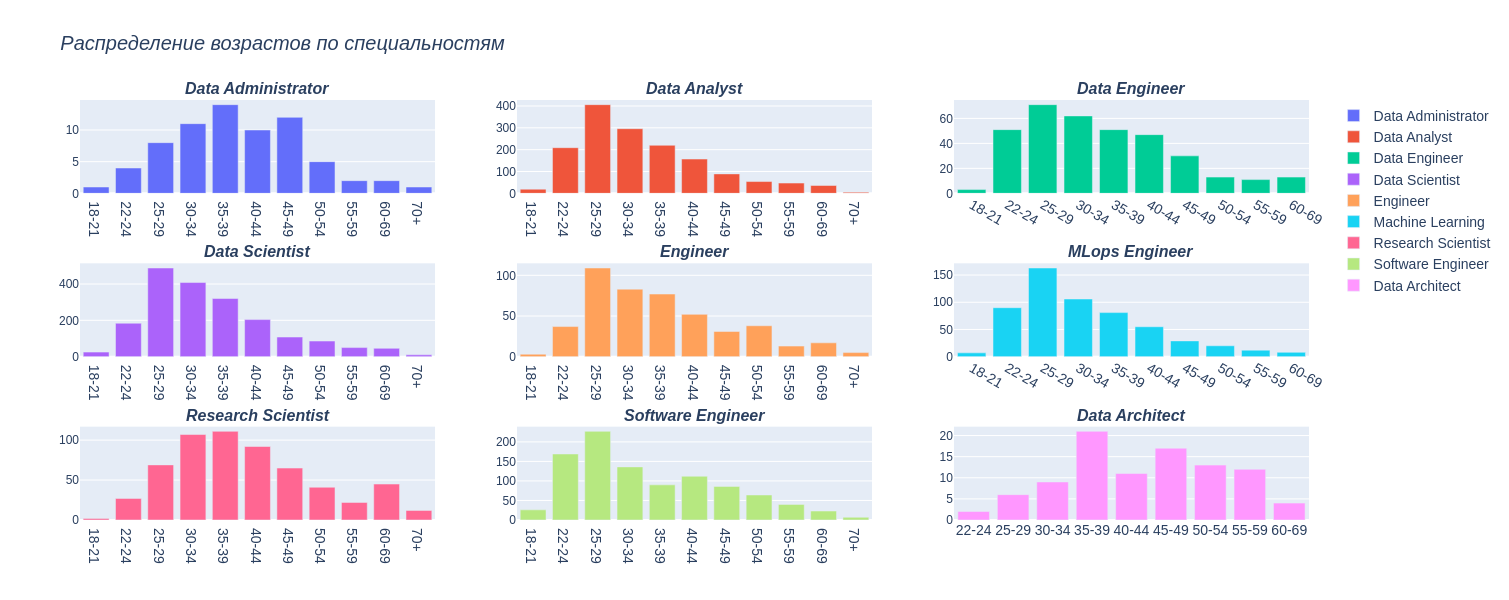

In [12]:
# Создадим таблицу подграфиков размерностью spec_list
fig2 = make_subplots(rows=len(spec_list), cols=len(spec_list[0]),  
                     subplot_titles = ['<b><i>'+_+'</i></b>' for _ in title_list])    # Список заголовков подграфиков

for i in range(len(spec_list)):                                                       # Для каждой строки...
    for j in range(len(spec_list[0])):                                                # ... и столбца...
        data5 = data4[data4.Q23.str.startswith(spec_list[i][j], na=False)]            # ...создадим выборку по специальности
        fig2.add_trace(go.Bar(x=data5.Q2, y=data5.counter, name=spec_list[i][j]),     # ... добавиим данные
                       row=i+1, col=j+1)

fig2.update_layout(title={'text':'<i>Распределение возрастов по специальностям</i>',  # Установка дополнительных параметров
                          'x': 0.04},                                                 # ... положение надписи
                   height=600, width = 1000,                                          # ширина/высота фигуры
                   title_font_family='Arial', title_font_size=20, 
                   legend={'title': '', 'font': {'family':'Arial', 'size':14}})
fig2.update_xaxes(tickfont_family="Arial", tickfont_size=14)
fig2.update_annotations(font={'family':'Arial', 'size':16})
fig2.show()
#str(fig2.to_dict())

## Задание 5

Используя библиотеку plotly, построй карту стран респондентов. В этом вам поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/). \
В аргументах функции укажи параметр color_continuous_scale="Viridis".

In [13]:
# Код тут
# Q4 - In which country do you currently reside?
import json
import plotly.express as px
data5 = data[data.Q4 != 'Other']  # Исключить респондентов, не указавших страну
data5 = data5[data5.Q4 != 'I do not wish to disclose my location'].Q4.unique();
data5

array(['India', 'Algeria', 'Egypt', 'France', 'Germany', 'Australia',
       'South Korea', 'United States of America', 'Pakistan', 'Mexico',
       'Singapore', 'Italy', 'Taiwan', 'China', 'Argentina', 'Turkey',
       'Brazil', 'Nigeria', 'Chile', 'Japan', 'Canada', 'Indonesia',
       'Israel', 'Colombia', 'Russia',
       'United Kingdom of Great Britain and Northern Ireland', 'Ethiopia',
       'South Africa', 'Viet Nam', 'Kenya', 'Spain',
       'Iran, Islamic Republic of...', 'Cameroon', 'Tunisia', 'Peru',
       'Nepal', 'Morocco', 'Philippines', 'Ecuador', 'Thailand',
       'United Arab Emirates', 'Bangladesh', 'Netherlands', 'Zimbabwe',
       'Ghana', 'Portugal', 'Poland', 'Saudi Arabia', 'Romania',
       'Czech Republic', 'Malaysia', 'Sri Lanka', 'Hong Kong (S.A.R.)',
       'Ukraine', 'Belgium', 'Ireland'], dtype=object)

In [14]:
country_file = open('country.json')
countries = json.load(country_file)
countries
for country in data5:
    if country in countries:
        print("'", country, "':'", countries[country]['alpha3'], "',", sep='')
    else:
        print("'", country, "':'", "None',", sep='')

'India':'IND',
'Algeria':'DZA',
'Egypt':'EGY',
'France':'FRA',
'Germany':'DEU',
'Australia':'AUS',
'South Korea':'None',
'United States of America':'None',
'Pakistan':'PAK',
'Mexico':'MEX',
'Singapore':'SGP',
'Italy':'ITA',
'Taiwan':'None',
'China':'CHN',
'Argentina':'ARG',
'Turkey':'TUR',
'Brazil':'BRA',
'Nigeria':'NGA',
'Chile':'CHL',
'Japan':'JPN',
'Canada':'CAN',
'Indonesia':'IDN',
'Israel':'ISR',
'Colombia':'COL',
'Russia':'None',
'United Kingdom of Great Britain and Northern Ireland':'None',
'Ethiopia':'ETH',
'South Africa':'ZAF',
'Viet Nam':'VNM',
'Kenya':'KEN',
'Spain':'ESP',
'Iran, Islamic Republic of...':'None',
'Cameroon':'CMR',
'Tunisia':'TUN',
'Peru':'PER',
'Nepal':'NPL',
'Morocco':'MAR',
'Philippines':'None',
'Ecuador':'ECU',
'Thailand':'THA',
'United Arab Emirates':'None',
'Bangladesh':'BGD',
'Netherlands':'None',
'Zimbabwe':'ZWE',
'Ghana':'GHA',
'Portugal':'PRT',
'Poland':'POL',
'Saudi Arabia':'SAU',
'Romania':'ROU',
'Czech Republic':'None',
'Malaysia':'MYS',
'Sri Lanka

In [15]:
country_code = {
     'India':'IND', 'Algeria':'DZA', 'Egypt':'EGY', 'France':'FRA',
     'Germany':'DEU', 'Australia':'AUS', 'South Korea':'KOR',
     'United States of America':'USA', 'Pakistan':'PAK', 'Mexico':'MEX',
     'Singapore':'SGP', 'Italy':'ITA', 'Taiwan':'TWN', 'China':'CHN',
     'Argentina':'ARG', 'Turkey':'TUR', 'Brazil':'BRA', 'Nigeria':'NGA',
     'Chile':'CHL', 'Japan':'JPN', 'Canada':'CAN', 'Indonesia':'IDN',
     'Israel':'ISR', 'Colombia':'COL', 'Russia':'RUS',
     'United Kingdom of Great Britain and Northern Ireland':'GBR',
     'Ethiopia':'ETH', 'South Africa':'ZAF', 'Viet Nam':'VNM', 'Kenya':'KEN',
     'Spain':'ESP', 'Iran, Islamic Republic of...':'IRN', 'Cameroon':'CMR',
     'Tunisia':'TUN', 'Peru':'PER', 'Nepal':'NPL', 'Morocco':'MAR',
     'Philippines':'PHL', 'Ecuador':'ECU', 'Thailand':'THA', 
     'United Arab Emirates':'ARE', 'Bangladesh':'BGD', 'Netherlands':'NLD',
     'Zimbabwe':'ZWE', 'Ghana':'GHA', 'Portugal':'PRT', 'Poland':'POL',
     'Saudi Arabia':'SAU', 'Romania':'ROU', 'Czech Republic':'CZE',
     'Malaysia':'MYS', 'Sri Lanka':'LKA', 'Hong Kong (S.A.R.)':'HKG',
     'Ukraine':'UKR', 'Belgium':'BEL', 'Ireland':'IRL'
}
country_code

{'India': 'IND',
 'Algeria': 'DZA',
 'Egypt': 'EGY',
 'France': 'FRA',
 'Germany': 'DEU',
 'Australia': 'AUS',
 'South Korea': 'KOR',
 'United States of America': 'USA',
 'Pakistan': 'PAK',
 'Mexico': 'MEX',
 'Singapore': 'SGP',
 'Italy': 'ITA',
 'Taiwan': 'TWN',
 'China': 'CHN',
 'Argentina': 'ARG',
 'Turkey': 'TUR',
 'Brazil': 'BRA',
 'Nigeria': 'NGA',
 'Chile': 'CHL',
 'Japan': 'JPN',
 'Canada': 'CAN',
 'Indonesia': 'IDN',
 'Israel': 'ISR',
 'Colombia': 'COL',
 'Russia': 'RUS',
 'United Kingdom of Great Britain and Northern Ireland': 'GBR',
 'Ethiopia': 'ETH',
 'South Africa': 'ZAF',
 'Viet Nam': 'VNM',
 'Kenya': 'KEN',
 'Spain': 'ESP',
 'Iran, Islamic Republic of...': 'IRN',
 'Cameroon': 'CMR',
 'Tunisia': 'TUN',
 'Peru': 'PER',
 'Nepal': 'NPL',
 'Morocco': 'MAR',
 'Philippines': 'PHL',
 'Ecuador': 'ECU',
 'Thailand': 'THA',
 'United Arab Emirates': 'ARE',
 'Bangladesh': 'BGD',
 'Netherlands': 'NLD',
 'Zimbabwe': 'ZWE',
 'Ghana': 'GHA',
 'Portugal': 'PRT',
 'Poland': 'POL',
 'Saudi

In [16]:
data_country = data[['Q4']] \
                    .groupby('Q4', as_index=False) \
                    .value_counts() \
                    .rename(columns={'count':'counter'})
data_country['code'] = data_country['Q4'].map(country_code)
data_country[:2]

Q4  counter code
0    Algeria       62  DZA
1  Argentina      204  ARG

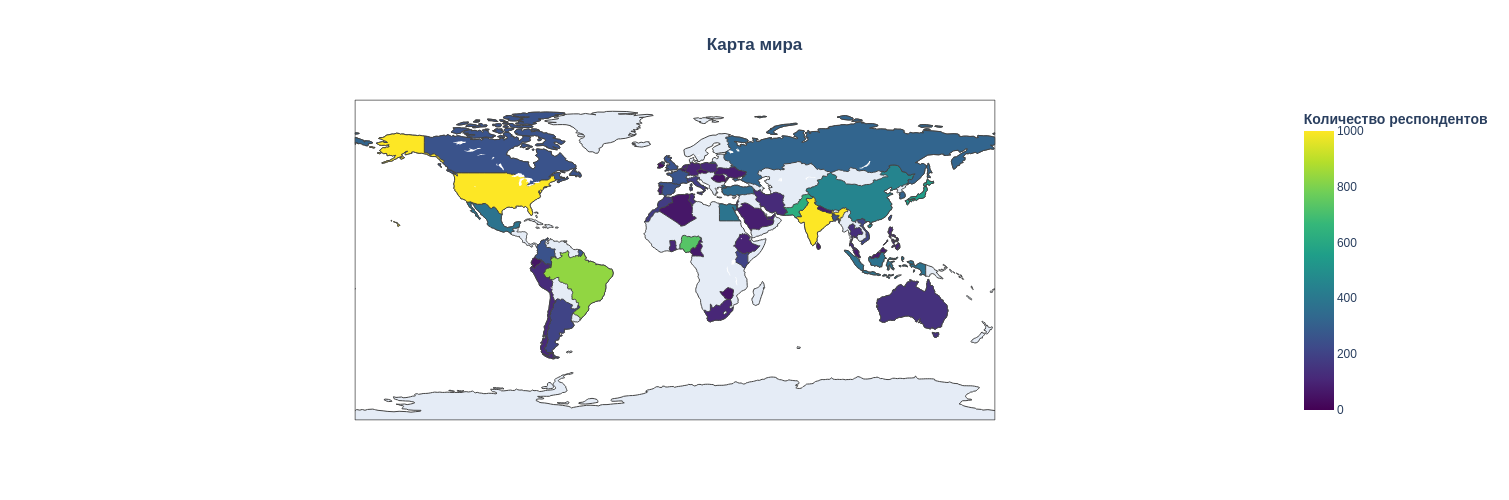

In [17]:
fig3 = px.choropleth(data_country, 
                     locations='code',
#                     location='country',
#                     locationmode='country names',
                     color_continuous_scale='Viridis', color='counter',
                     hover_name='Q4', 
                     range_color=(0, 1000),
                     labels={'counter':'<b>Количество респондентов</b>'},
                     title='<b>Карта мира</b>')
fig3.update_layout(title={'x':0.5}, width=700, height=500,)
fig3.show()

## Задание 6 - Дополнительное

Одна из самых красивых и динамичных визуализаций - это [Bar Chart Race](https://pypi.org/project/bar-chart-race/). 
Выбери данные, которые интересно было бы визуализировать с помощью этой библиотеки, и поделись с ним со своими одногруппниками. \
Загрузи итоговую визуализацию на гит в формате .gif.

In [18]:
# Код тут
data6 = data.rename(columns={'Duration (in seconds)':'Q1'})[['Q4', 'Q2']]
data7 = pd.crosstab(data6['Q2'], data6['Q4'], margins=False)
data7

Q4     Algeria  Argentina  Australia  Bangladesh  Belgium  Brazil  Cameroon   
Q2                                                                            
18-21       10         11          6          26        0      45        10  \
22-24       14         15         12          98        4      81         9   
25-29       11         26         20          73        7     139        22   
30-34       10         18         22          11        6     135        14   
35-39        3         39         23          18        2     131         7   
40-44        6         42         22          18        6     100         3   
45-49        3         17         10           6        5      69         2   
50-54        1         16          8           1        9      46         1   
55-59        1         11          5           0        3      44         0   
60-69        3          7          9           0        5      35         0   
70+          0          2          5           0        4       8         0   

Q4     Canada  Chile  China  ...  Taiwan  Thailand  Tunisia  Turkey  Ukraine   
Q2                           ...                                               
18-21       9      2    104  ...      21        19       24      33       27  \
22-24      20      9    130  ...      30        12       51      68       12   
25-29      42     20    106  ...      57        16       15      73        9   
30-34      59     18     50  ...      34        18       12      46       10   
35-39      31     20     32  ...      22        16        9      53        4   
40-44      32     11     16  ...      28        22        9      41        8   
45-49      17     14      9  ...      16        13        2      13        5   
50-54      17      9      3  ...      15        10        0      12        1   
55-59      10      7      3  ...      13         5        2       5        2   
60-69      13      4      0  ...       6         0        1       1        0   
70+         7      1      0  ...       0         1        0       0        1   

Q4     United Arab Emirates   
Q2                            
18-21                     4  \
22-24                     6   
25-29                    14   
30-34                    15   
35-39                    22   
40-44                    11   
45-49                     9   
50-54                     6   
55-59                     5   
60-69                     1   
70+                       1   

Q4     United Kingdom of Great Britain and Northern Ireland   
Q2                                                            
18-21                                                 14     \
22-24                                                 23      
25-29                                                 38      
30-34                                                 36      
35-39                                                 40      
40-44                                                 36      
45-49                                                 23      
50-54                                                 25      
55-59                                                 10      
60-69                                                 12      
70+                                                    1      

Q4     United States of America  Viet Nam  Zimbabwe  
Q2                                                   
18-21                       175        81         6  
22-24                       256        58        12  
25-29                       413        24        17  
30-34                       430        21         5  
35-39                       406        15         8  
40-44                       335         8         4  
45-49                       243         2         0  
50-54                       245         3         2  
55-59                       183         0         0  
60-69                       185         0         0  
70+                          49         0         0  

[11 

In [19]:
!pip install bar_chart_race

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import bar_chart_race as bcr

fig6, ax6 = plt.subplots(figsize=(12, 4))
ax6.tick_params(axis='y')
fig6.set_tight_layout(True)
bcr1 = bcr.bar_chart_race(df=data7,
#                filename='race.gif',
                steps_per_period = 30,
                period_length=3000,
                fixed_order=False,
#                orientation='v',
                title='Количество специалистов по странам мира',
                n_bars=6,
                fig=fig6,
                fixed_max=True
               );
ax6.set(xlim=(0, 5000));
fig6.clear();
bcr1

/usr/local/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



<Figure size 1200x400 with 0 Axes>